Automatically created module for IPython interactive environment


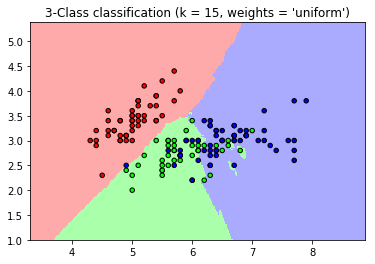

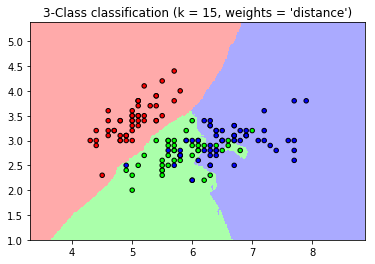

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [5]:
X.shape
y.shape

(150,)

Automatically created module for IPython interactive environment


C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


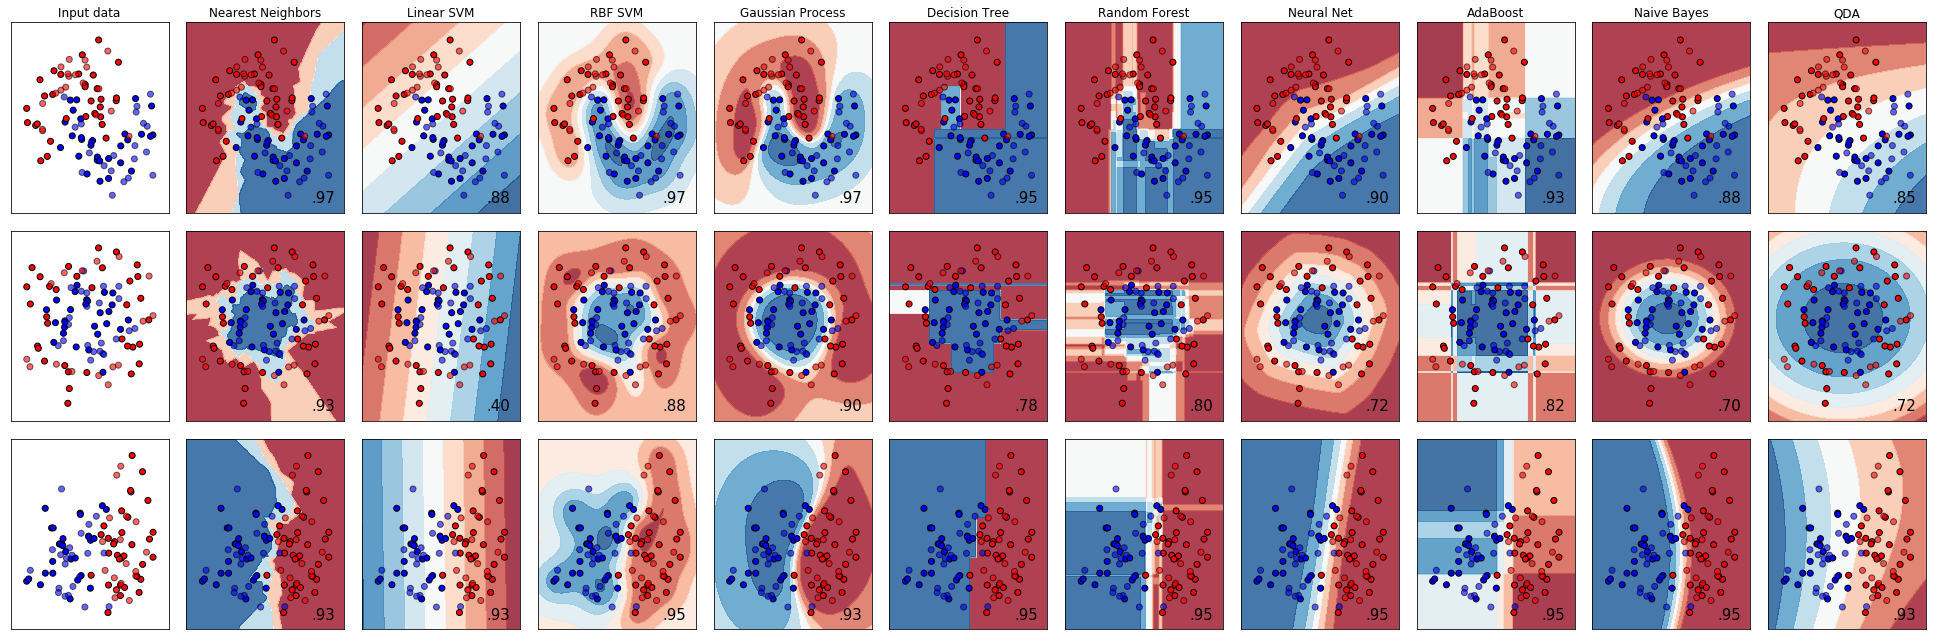

In [6]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [9]:
import scipy.io
data = scipy.io.loadmat('corel5k_train_annot.mat')  # 读取mat文件
# print(data.keys())   # 查看mat文件中的所有变量
'''
print(data['matrix1'])
print(data['matrix2'])
matrix1 = data['matrix1'] 
matrix2 = data['matrix2']
print(matrix1)
print(matrix2)

'''

#scipy.io.savemat('matData2.mat',{'matrix1':matrix1, 'matrix2':matrix2})  # 写入mat文件

"\nprint(data['matrix1'])\nprint(data['matrix2'])\nmatrix1 = data['matrix1'] \nmatrix2 = data['matrix2']\nprint(matrix1)\nprint(matrix2)\n\n"

In [13]:
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Oct 25 22:27:30 2013',
 '__version__': '1.0',
 'annot1': array([[1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]], dtype=uint16)}

In [15]:
matr=data['annot1']

In [16]:
matr.shape

(4500, 260)

In [17]:
test = scipy.io.loadmat('corel5k_test_annot.mat')

In [19]:
test_matr=test['annot2']

In [20]:
test_matr.shape

(499, 260)

In [22]:
matr

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint16)

In [23]:
np.savetxt("train.txt",matr)

In [26]:
f = open("corel5k_test_list.txt","r+")       # 返回一个文件对象   
line = f.readline()                      # 调用文件的 readline()方法  
test_list=[" "]
while line:   
    test_list.append(line)                   
    line = f.readline()    
f.close() 

In [28]:
test_list

AttributeError: 'list' object has no attribute 'shape'

In [29]:
len(test_list)

500

In [43]:
for i in range(len(test_list)):
    OneLine=test_list[i]
    sp=OneLine.split("/")
    print(sp[-1])

 
1001

1002

1024

1029

1055

1061

1071

1076

1081

1098

10017

10018

10021

10026

10043

10060

10063

10064

10065

10075

12011

12018

12019

12041

12049

12055

12064

12066

12095

12096

13001

13002

13012

13020

13046

13055

13057

13066

13077

13092

17006

17011

17016

17017

17018

17032

17039

17040

17041

17094

20004

20017

20020

20024

20030

20062

20078

20095

20096

20097

21003

21004

21016

21017

21032

21034

21036

21072

21088

21097

22004

22012

22013

22014

22023

22032

22040

22063

22080

33002

33009

33020

33025

33040

33065

33072

33077

33078

33097

34010

34031

34036

34043

34049

34065

34066

34082

34094

34097

41003

41005

41010

41028

41034

41042

41073

41082

41085

41087

46007

46021

46035

46066

46072

46073

46074

46089

46093

46096

100002

100030

100031

100053

100062

100067

100068

100077

100087

100092

101002

101004

101007

101022

101045

101050

101051

101058

101067

101070

102002

102009


In [88]:
import os
# os.walk()遍历文件夹下的所有文件
# os.walk()获得三组数据(rootdir, dirname,filnames)
def file_path(file_dir):
    allJpg=['']
    allFiles=['']
    for root, dirs, files in os.walk(file_dir):
        #print(dirs, end=' ')
        #print(root, end=' ')
        #paths=root+dirs
        #print(root, end=' ')    # 当前目录路径
        #print(dirs, end=' ')    # 当前路径下的所有子目录
        #print(files)
        print(dirs)
        allFiles.append(dirs)
        allJpg.append(files)
        #print(paths)
        
    return allJpg,allFiles

In [89]:
src_path="C:\EnglishPath\Corel5K"
List_files,List_Src=file_path(src_path)

['1000', '10000', '100000', '101000', '102000', '103000', '104000', '108000', '109000', '113000', '118000', '119000', '12000', '120000', '121000', '122000', '13000', '130000', '131000', '140000', '142000', '143000', '144000', '147000', '148000', '152000', '153000', '161000', '163000', '17000', '171000', '173000', '174000', '182000', '183000', '187000', '189000', '20000', '201000', '21000', '22000', '231000', '276000', '296000', '33000', '335000', '34000', '384000', '41000', '46000']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [104]:
List_files[2][0]
List_Src[1][0]
oneLine=src_path+"\\" +List_Src[1][0]+"\\"+List_files[3][4]
oneLine
List_Src[1][0]
List_files[2][0]

'1000.jpeg'

In [107]:
all_paths
for i in range(len(List_files)):
    
    #print(i)
    if(i>=2):
        for j in range(len(List_files[i])):
            #print(j)
            
            oneLine=src_path+"\\" +List_Src[1][i-2]+"\\"+List_files[i][j]
            #print(oneLine)
            all_paths.append(oneLine)
        

In [108]:
all_paths

['',
 'C:\\EnglishPath\\Corel5K\\46000\\46000.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46001.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46002.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46003.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46004.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46005.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46006.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46007.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46008.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46009.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46010.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46011.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46012.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46013.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46014.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46015.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46016.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46017.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46018.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\46019.jpeg',
 'C:\\EnglishPath\\Corel5K\\46000\\

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from PIL import Image

In [115]:
def image2vector (image):
    returnVect=np.zeros((1,image.shape[0]*image.shape[1]))
    print(returnVect.shape)
    for i in range (image.shape[0]):
        for j in range (image.shape[1]):
            #print(str(i)+" "+str(j)+"  = "+str(256*i+j))
            returnVect[0,image.shape[1]*i+j]=image[i][j]
    return returnVect

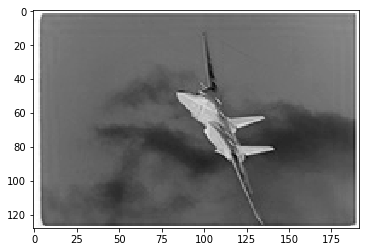

In [123]:
onePath="C:\\EnglishPath\\Corel5K\\10000\\10000.jpeg"
image=mpimg.imread(onePath)

image=ColorToGrey(image)

plt.imshow(image, cmap = plt.cm.gray_r)
plt.show()

In [127]:
length=img.shape[0]*img.shape[1]

In [120]:
def ColorToGrey(img):
    img = np.array(img)
    if img.ndim == 3:
        img = img[:,:,0]
    return img


In [135]:
#data=np.array(image.reshape(1,length))
data=image.reshape(1,length)
#data=np.vstack((data,image.reshape(1,length)))


In [136]:
data.shape

(1, 24576)